<a href="https://colab.research.google.com/github/Farazmghm/Portfolio/blob/main/bank_churn_analysis_and_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('/content/drive/MyDrive/Churn_Modelling.csv')

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.shape

(10000, 14)

In [6]:
df.dtypes

,0
RowNumber,int64
CustomerId,int64
Surname,object
CreditScore,int64
Geography,object
Gender,object
Age,int64
Tenure,int64
Balance,float64
NumOfProducts,int64


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [9]:
df.nunique()

,0
RowNumber,10000
CustomerId,10000
Surname,2932
CreditScore,460
Geography,3
Gender,2
Age,70
Tenure,11
Balance,6382
NumOfProducts,4


###Handlin Null

In [10]:
df.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


####Duplicate

In [11]:
df.duplicated().sum()

0

In [12]:
df.sample(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
526,527,15600258,Chesnokova,701,France,Male,43,2,0.00,2,1,1,165303.79,0
1372,1373,15723006,Gorbunova,489,France,Male,38,8,0.00,2,0,1,196990.79,0
6542,6543,15785831,Sinclair,591,France,Male,35,7,183027.25,1,1,1,56028.79,0
1439,1440,15806967,Simmons,778,France,Female,65,7,0.00,1,1,1,77867.23,0
732,733,15723873,Ponomarev,657,Spain,Male,31,3,125167.02,1,0,0,98820.39,0
5133,5134,15668104,Kerr,479,Spain,Male,37,6,118433.94,1,0,1,160060.90,0
7474,7475,15799859,Lucchesi,704,France,Male,50,4,165438.26,1,1,0,120770.75,1
4912,4913,15792228,Onwumelu,748,France,Male,60,0,152335.70,1,1,0,126743.33,1
6684,6685,15746333,Blake,562,France,Female,57,3,0.00,3,1,0,6554.97,1
2229,2230,15756125,Booth,757,Spain,Male,44,5,140856.16,2,1,0,158735.10,0


In [13]:
df=df.drop(columns=['RowNumber','CustomerId','Surname'],axis=1)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [14]:
df['Exited']=df['Exited'].map({0:'True',1:'False'})

In [15]:
df['Exited'].value_counts()

,count
Exited,
True,7963
False,2037


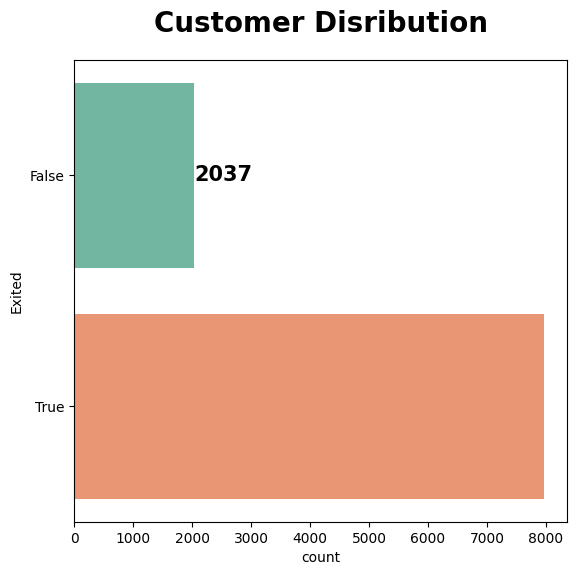

In [16]:
count = df["Exited"].value_counts()

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
ax=sns.countplot(df["Exited"],palette="Set2")
ax.bar_label(ax.containers[0],fontweight="black",size=15)
plt.title("Customer Disribution",fontweight="black",size=20,pad=20)
plt.show()

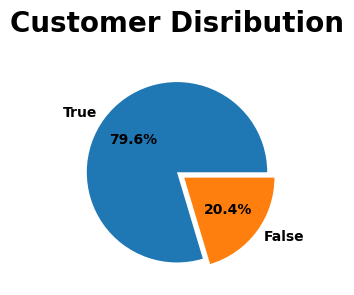

In [17]:
plt.subplot(1,2,2)
plt.pie(count.values, labels=count.index, autopct="%1.1f%%",colors=sns.set_palette("Set2"),
        textprops={"fontweight":"black"},explode=[0,0.1])
plt.title("Customer Disribution",fontweight="black",size=20,pad=20)
plt.show()

In [18]:
def countplot(column):
    plt.figure(figsize=(15,5))
    ax = sns.countplot(x=column, data=df, hue="Exited",palette="Set2")
    for value in ax.patches:
        percentage = "{:.1f}%".format(100*value.get_height()/len(df[column]))
        x = value.get_x() + value.get_width() / 2 - 0.05
        y = value.get_y() + value.get_height()
        ax.annotate(percentage, (x,y), fontweight="black",size=15)

    plt.title(f"Customer Exited {column}",fontweight="black",size=20,pad=20)
    plt.show()

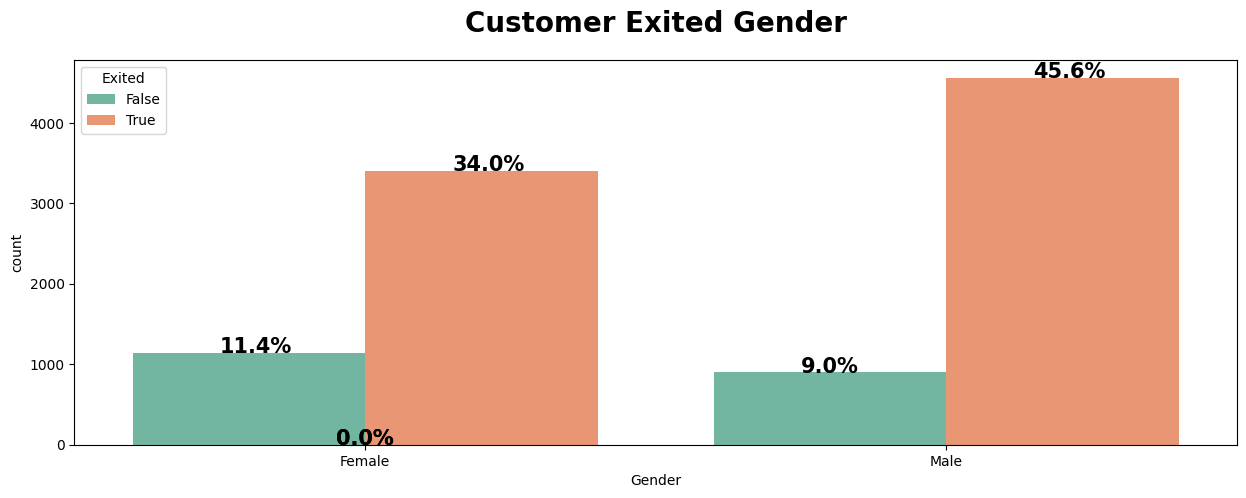

In [19]:
countplot("Gender")

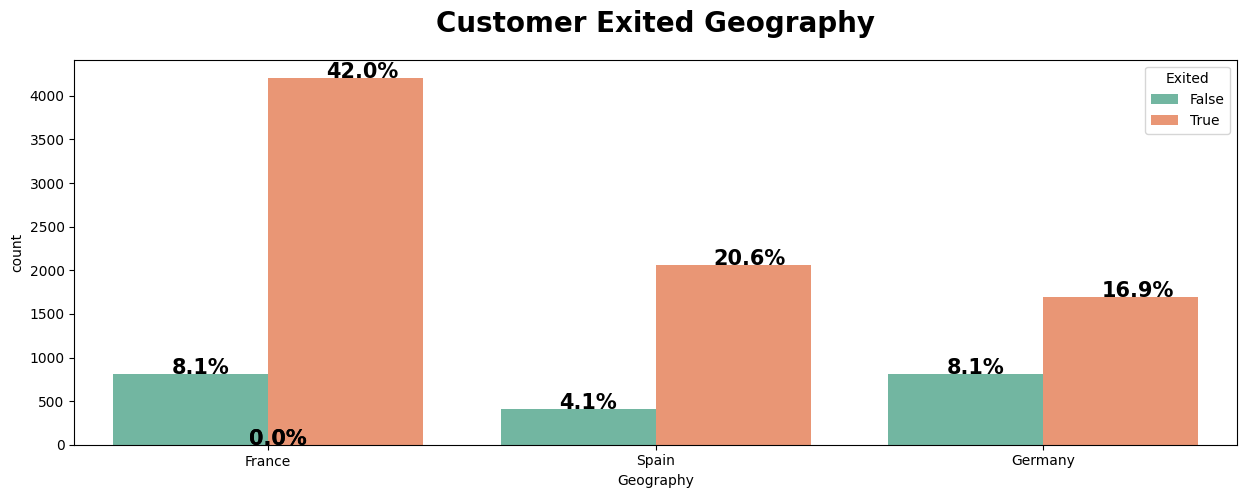

In [20]:
countplot("Geography")

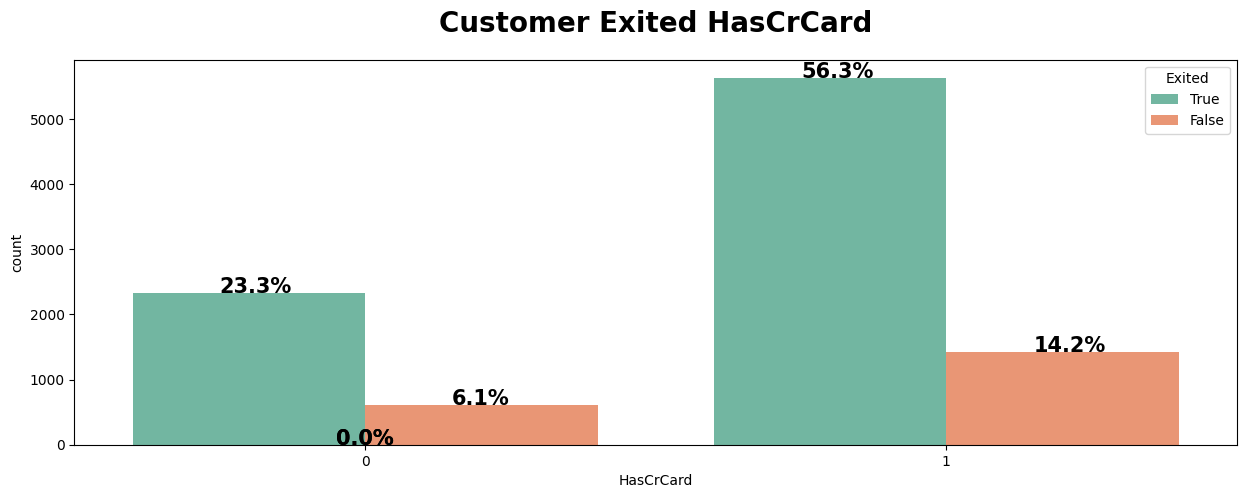

In [21]:
countplot("HasCrCard")

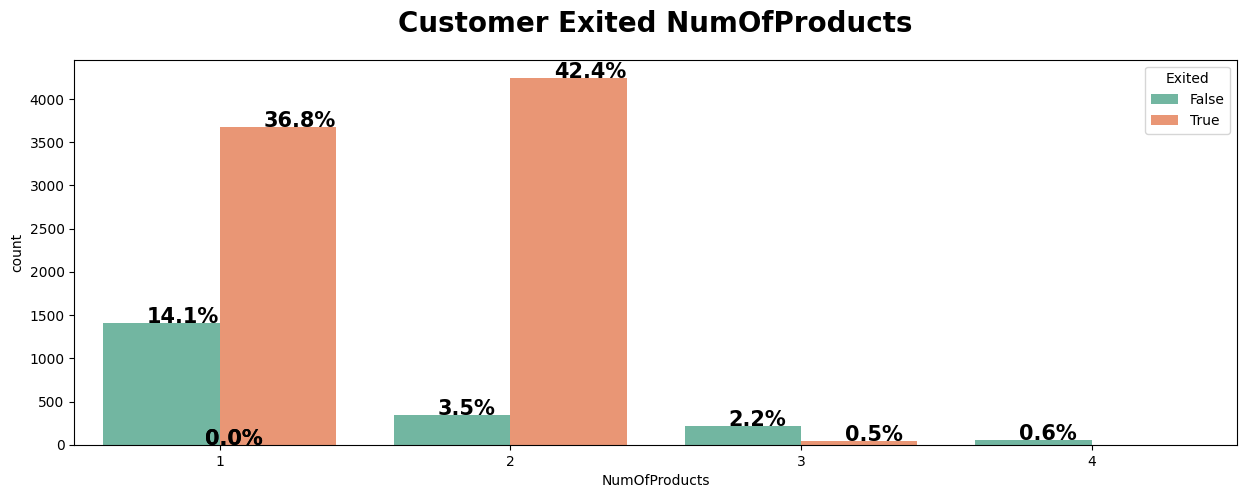

In [22]:
countplot("NumOfProducts")

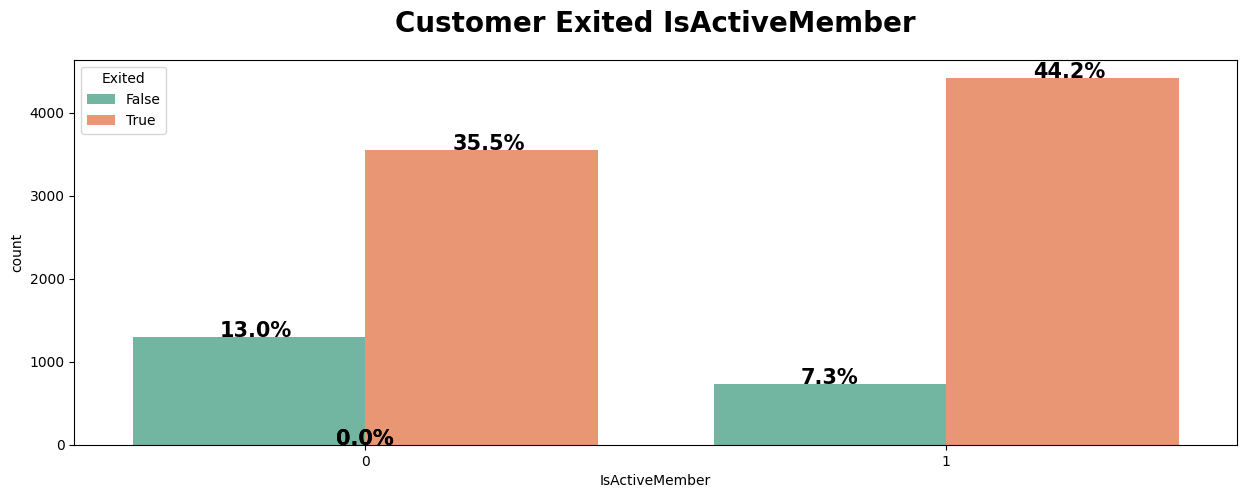

In [23]:
countplot("IsActiveMember")

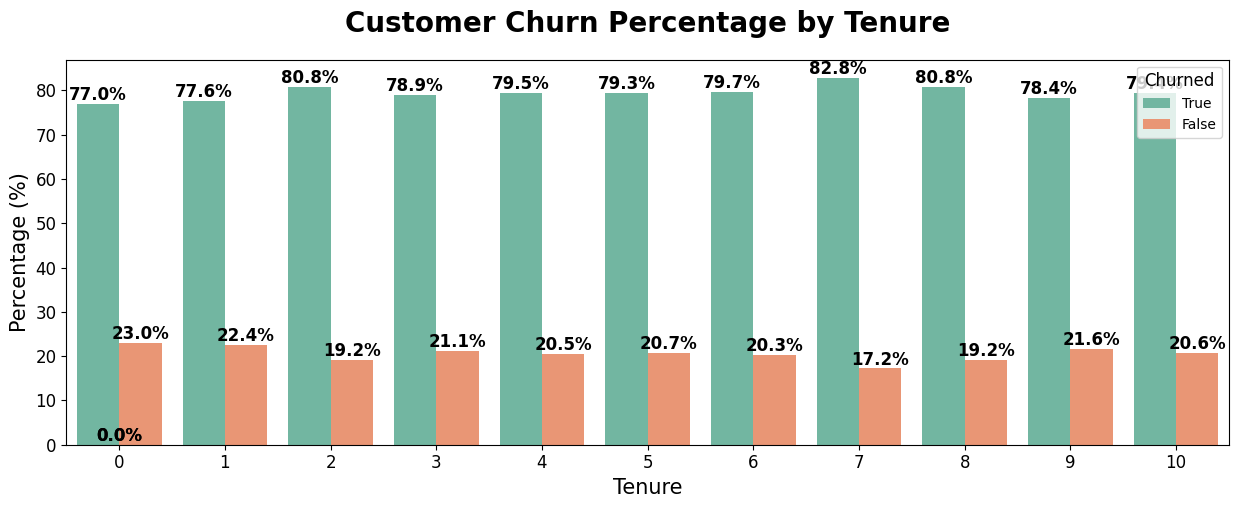

In [24]:
plt.figure(figsize=(15, 5))
churn_percentage = (
    df.groupby("Tenure")["Exited"]
    .value_counts(normalize=True)
    .mul(100)
    .rename("Percentage")
    .reset_index()
)

# Plot the bar plot
ax = sns.barplot(
    x="Tenure",
    y="Percentage",
    hue="Exited",
    data=churn_percentage,
    palette="Set2"
)

# Annotate the bars with percentages
for value in ax.patches:
    percentage = "{:.1f}%".format(value.get_height())
    x = value.get_x() + value.get_width() / 2
    y = value.get_height()
    ax.annotate(percentage, (x, y), fontweight="black", size=12, ha="center", va="bottom")

# Add title and labels
plt.title("Customer Churn Percentage by Tenure", fontweight="black", size=20, pad=20)
plt.ylabel("Percentage (%)", fontsize=15)
plt.xlabel("Tenure", fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title="Churned", title_fontsize=12, fontsize=10)
plt.show()

In [26]:
df['Exited']=df['Exited'].map({'True':0,'False':1})

In [27]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


###Skewness and Kurtosis

CreditScore:
  Skewness: -0.07
  Kurtosis: -0.43


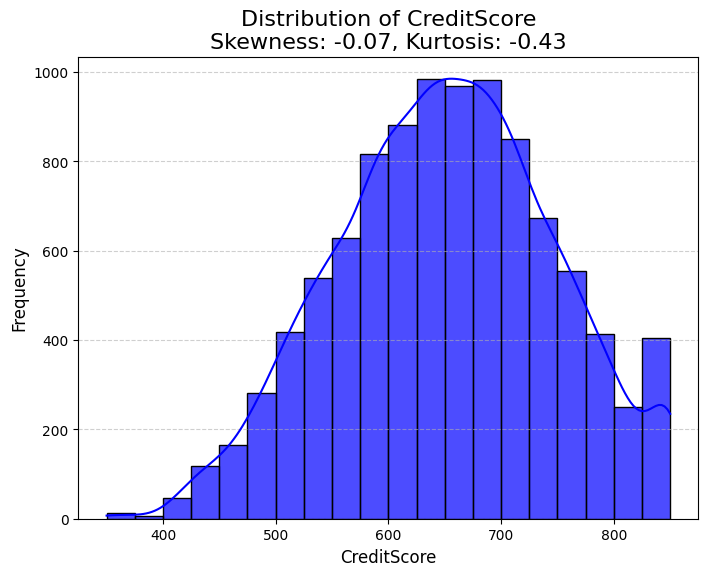

Age:
  Skewness: 1.01
  Kurtosis: 1.40


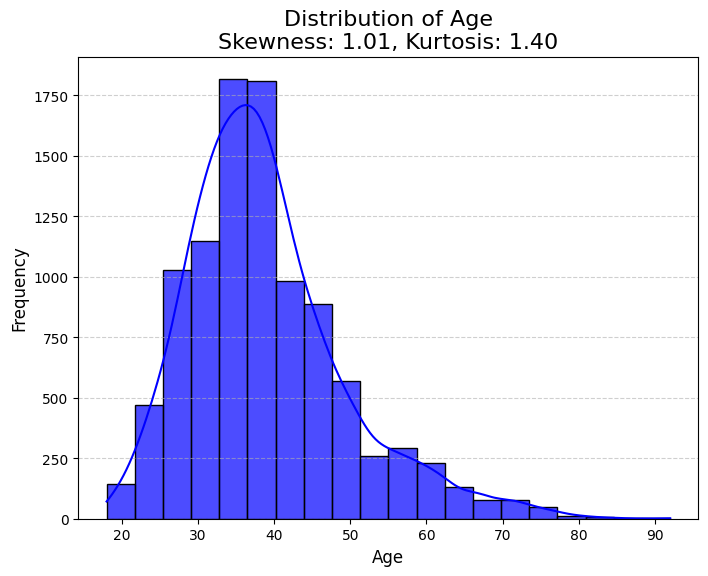

Balance:
  Skewness: -0.14
  Kurtosis: -1.49


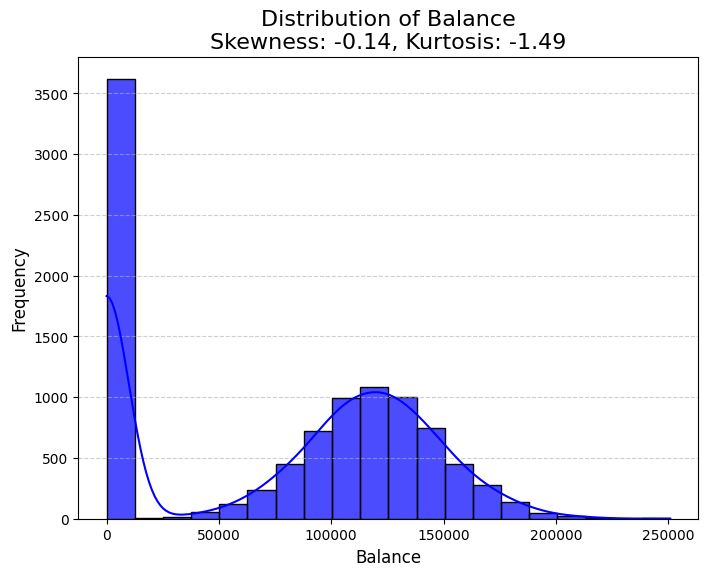

EstimatedSalary:
  Skewness: 0.00
  Kurtosis: -1.18


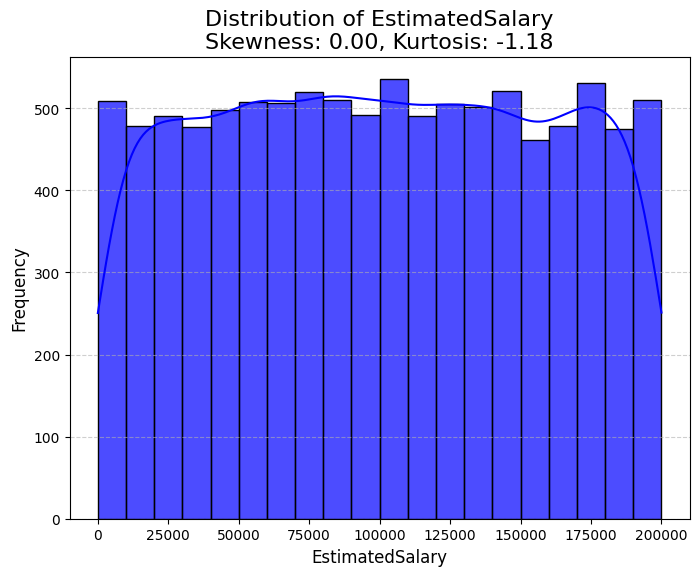

In [29]:
import seaborn as sns
columns=['CreditScore','Age','Balance','EstimatedSalary']
for column in columns:
    skewness = df[column].skew()
    kurtosis = df[column].kurtosis()
    print(f"{column}:")
    print(f"  Skewness: {skewness:.2f}")
    print(f"  Kurtosis: {kurtosis:.2f}")

    plt.figure(figsize=(8, 6))
    sns.histplot(df[column], kde=True, color='blue', bins=20, alpha=0.7)
    plt.title(f"Distribution of {column}\nSkewness: {skewness:.2f}, Kurtosis: {kurtosis:.2f}", fontsize=16)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.show()

###checking balancing

In [30]:
df['Exited'].value_counts()


,count
Exited,
0,7963
1,2037


In [33]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Geography']=le.fit_transform(df['Geography'])
df['Gender']=le.fit_transform(df['Gender'])

In [34]:
from imblearn.over_sampling import ADASYN
ada=ADASYN(random_state=42)
X=df.drop(columns=['Exited'])
y=df['Exited']
X_res,y_res=ada.fit_resample(X,y)


In [35]:
df.value_counts()

CreditScore  Geography  Gender  Age  Tenure  Balance    NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited
350          0          0       40   0       111098.85  1              1          1               172321.21        1         1
695          0          1       36   4       161533.00  1              1          0               100940.91        0         1
                        0       36   2       0.00       2              0          1               167749.54        0         1
                                42   0       0.00       2              0          1               140724.64        0         1
                                     5       0.00       1              0          1               72172.13         1         1
                                                                                                                            ..
608          0          1       42   5       0.00       2              1          0               178504.29        0         1
                                     10      163548.07  1              1          0               38866.85         0         1
                                50   6       0.00       1              1          0               93568.77         1         1
                                59   1       0.00       1              1          0               70649.64         1         1
850          2          1       71   10      69608.14   1              1          0               97893.40         1         1
Name: count, Length: 10000, dtype: int64

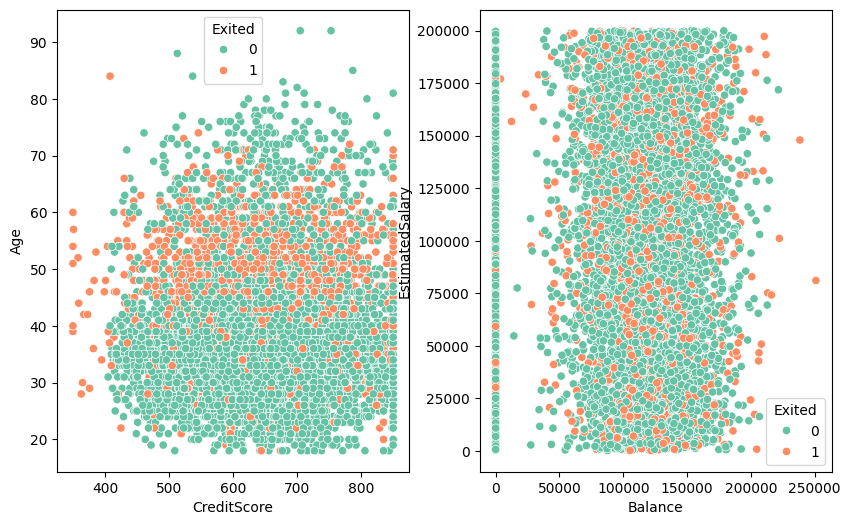

In [36]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.scatterplot(data=df,x='CreditScore',y='Age',hue='Exited')
plt.subplot(1,2,2)
sns.scatterplot(data=df,x='Balance',y='EstimatedSalary',hue='Exited')
plt.show()




##Prediction